## Problem 2
Problem Statement 2: For Question2 either use read_csv if file is csv ....if file is excel then use read_excel
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4


Output values in the prediction:
1 = 180.38
2 = 1312.07
3 = 440.13
4 = 343.72


## Data understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('data_final.xlsx')
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [3]:
df.shape

(100, 3)

In [4]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
df.nunique()

observation     65
feature         61
price          100
dtype: int64

## Data Preparing

In [7]:
X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1].values
X=X.reshape(-1,1)

In [8]:
# Splitting the dataset:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

* In the question it is mentioned that independent columns will have polynomial features, SO, we will perform Polynomial regression of degree 4

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pol_reg=PolynomialFeatures(degree=4)
X_pol=pol_reg.fit_transform(X)

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [11]:
reg2=LinearRegression()
reg2.fit(X_pol,Y)

LinearRegression()

In [12]:
y_pred1 = reg.predict(X)

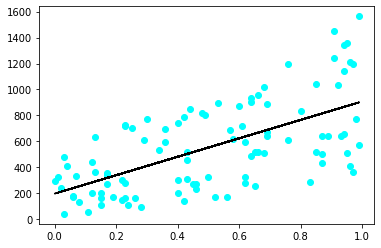

In [13]:
plt.scatter(X,Y,color='cyan')
plt.plot(X,y_pred1,color='black')

In [14]:
y_pred2=reg2.predict(pol_reg.fit_transform(X))

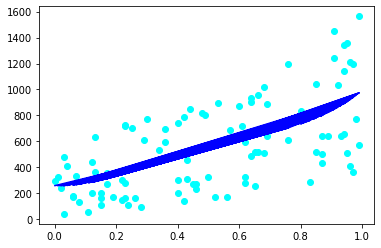

In [15]:
plt.scatter(X,Y,color='cyan')
plt.plot(X,y_pred2,color='b')

### IN this graph we can see the small variation by prediction in the blue area w.r.t. our best fit line...